In [50]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt


highGoldenRatio = 1.6180339
lowGoldenRatio = 0.618

"""Método de optimización por medio de la razón dorada
        
        threshold: tupla con el limite minimo y maximo (en ese orden).
        f: funcion a optimizar.
        epsilon: parametro de parada.
        numIterations: numero maximo de iteraciones.
        goldenRatio: indica el valor que tomara la razon dorada, usar 0 para 0.618 o 1 para 1.6180339.
        method: indica si se encontrara el minimo o el maximo de la función, usar 0 o 1 respectivamente.
        """

def goldenFunction(threshold, f, epsilon, numIterations, goldenRatio, method):
    values = pd.DataFrame(columns=('xl', 'xu', 'x1', 'x2', 'f(xl)', 'f(xu)', 'f(x1)', 'f(x2)'))
    xl = threshold[0]
    xu = threshold[1]
    error = 1000
    i = 0
    while((i < numIterations) and (error > epsilon)):
        if goldenRatio == 0:
            d = lowGoldenRatio * (xu - xl)
            x1 = xl + d
            x2 = xu - d
        else:
            x1 = xl + (xu - xl) / (1 - highGoldenRatio)
            x2 = xl + (xu - x1)

        raw_data = {'f(x)':[f(xl), f(xu), f(x1), f(x2)], 'X': [xl, xu, x1, x2]}
        updateValues = pd.DataFrame(raw_data, columns = ['f(x)', 'X'])
        if(method == 1):
            updateValues = updateValues.sort_values(['f(x)'], ascending=[False]).head(3)
        else:
            updateValues = updateValues.sort_values(['f(x)'], ascending=[True]).head(3)
        xl = updateValues[['X']].values.min()
        xu = updateValues[['X']].values.max()
        
        values.loc[len(values)] = [xl, xu, x1, x2, f(xl), f(xu), f(x1), f(x2)]
        error = m.fabs(xl-xu)
        i = i + 1
    return values
        
def optimalValue(method, valuesDF, f):
    optimalValues = valuesDF.loc[len(valuesDF) -1]
    optimalValues = optimalValues[['xl', 'xu']].values
    evaluateOptimalValues = list(map(f, optimalValues))
    if(method ==0):
        return optimalValues[evaluateOptimalValues.index(min(evaluateOptimalValues))]
    return optimalValues[evaluateOptimalValues.index(max(evaluateOptimalValues))]  

def optimization(threshold, f, epsilon, numIterations, goldenRatio, method):
    values = goldenFunction(threshold, f, epsilon, numIterations, goldenRatio, method)
    v = optimalValue(method, values, f)
    
    t1 = np.arange(threshold[0] - 0.1, threshold[1] + .1, 0.1)
    markers_on = [v * 10]
    plt.figure(1)
    plt.plot(t1, myfunc(t1), '-gD', markevery=markers_on)
    
    return HTML(""""<h1 style="color:red;" align="center">Funcion dorada</h1>
        <h2>Historial</h2>
        """ + values.to_html() + """
        <h2>Valor optimo</h2>
        <p>""" + str(v) + """</p>
        <h2>Grafica</h2>"""
        )

    

,xl,xu,x1,x2,f(xl),f(xu),f(x1),f(x2)
0,2.292000,6.000000,3.708000,2.292000,1.082736,0.000000,3.914736,1.082736
1,2.292000,4.583544,4.583544,3.708456,1.082736,3.659476,3.659476,3.915002
2,3.167370,4.583544,3.708174,3.167370,3.306727,3.659476,3.914838,3.306727
3,3.708348,4.583544,4.042565,3.708348,3.914939,3.659476,3.998188,3.914939
4,3.708348,4.249219,4.249219,4.042673,3.914939,3.937890,3.937890,3.998179
5,3.914961,4.249219,4.042607,3.914961,3.992768,3.937890,3.998185,3.992768
6,3.914961,4.121533,4.121533,4.042648,3.992768,3.985230,3.985230,3.998181
7,3.914961,4.042622,4.042622,3.993871,3.992768,3.998183,3.998183,3.999962
8,3.963728,4.042622,3.993856,3.963728,3.998684,3.998183,3.999962,3.998684


/home/skorpionx/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:223: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  return Path(verts[markevery],


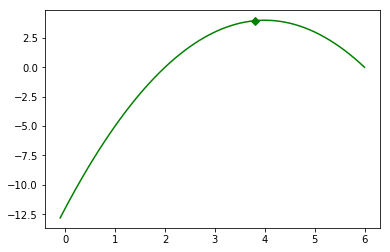

In [58]:
def myfunc(x):
    return -x**2+8*x-12

optimization((0,6), myfunc, 0.1, 20, 0, 1)